In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [3]:
Cyber_Sec_DF = pd.read_csv('cybersecurity_attacks.csv')

In [4]:
Cyber_Sec_DF

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,...,Logged,Medium,Adira Madan,Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...,Segment A,"Nashik, Manipur",NaN,Log Data,Alert Data,Firewall
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,...,Logged,High,Rati Dara,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,Segment C,"Vadodara, Mizoram",60.51.30.46,Log Data,NaN,Firewall
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,...,Blocked,Low,Samiha Joshi,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...,Segment C,"Mahbubnagar, Himachal Pradesh",NaN,Log Data,Alert Data,Server
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,...,Ignored,Low,Rasha Chauhan,Mozilla/5.0 (X11; Linux i686) AppleWebKit/536....,Segment B,"Rourkela, Arunachal Pradesh",137.76.130.8,Log Data,NaN,Server


In [5]:
Cyber_Sec_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [6]:
Cyber_Sec_DF.count()

Timestamp                 40000
Source IP Address         40000
Destination IP Address    40000
Source Port               40000
Destination Port          40000
Protocol                  40000
Packet Length             40000
Packet Type               40000
Traffic Type              40000
Payload Data              40000
Malware Indicators        20000
Anomaly Scores            40000
Alerts/Warnings           19933
Attack Type               40000
Attack Signature          40000
Action Taken              40000
Severity Level            40000
User Information          40000
Device Information        40000
Network Segment           40000
Geo-location Data         40000
Proxy Information         20149
Firewall Logs             20039
IDS/IPS Alerts            19950
Log Source                40000
dtype: int64

In [15]:
def get_feature_types(df):
    numerical_features = df.select_dtypes(include=['number']).columns.tolist()
    categorical_features = df.select_dtypes(exclude=['number']).columns.tolist()

    return categorical_features, numerical_features

# Example usage:
# Assuming 'df' is your Pandas DataFrame
categorical_cols, numerical_cols = get_feature_types(Cyber_Sec_DF)
print("Categorical Features:", categorical_cols)
print("Numerical Features:", numerical_cols)


Categorical Features: ['Source IP Address', 'Destination IP Address', 'Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators', 'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level', 'Device Information', 'Network Segment', 'Geo-location Data', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source']
Numerical Features: ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']


<b>Dropping irreverent features from my domain knowledge as these information will not relevant for this EDA</b><br>
- 'Timestamp'
- 'Payload Data'
- 'User Information'
- 'Proxy Information'

In [8]:
Cyber_Sec_DF.drop(columns=[ 'Timestamp', 'Payload Data', 'User Information', 'Proxy Information'] , inplace=True)

In [9]:
Cyber_Sec_DF

,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,...,Attack Type,Attack Signature,Action Taken,Severity Level,Device Information,Network Segment,Geo-location Data,Firewall Logs,IDS/IPS Alerts,Log Source
0,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,IoC Detected,28.67,...,Malware,Known Pattern B,Logged,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",Log Data,NaN,Server
1,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,IoC Detected,51.50,...,Malware,Known Pattern A,Blocked,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",Log Data,NaN,Firewall
2,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,IoC Detected,87.42,...,DDoS,Known Pattern B,Ignored,Low,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",Log Data,Alert Data,Firewall
3,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,NaN,15.79,...,Malware,Known Pattern B,Blocked,Medium,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,Alert Data,Firewall
4,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,NaN,0.52,...,DDoS,Known Pattern B,Blocked,Low,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",NaN,Alert Data,Firewall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,IoC Detected,39.28,...,DDoS,Known Pattern A,Logged,Medium,Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...,Segment A,"Nashik, Manipur",Log Data,Alert Data,Firewall
39996,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,IoC Detected,27.25,...,DDoS,Known Pattern A,Logged,High,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,Segment C,"Vadodara, Mizoram",Log Data,NaN,Firewall
39997,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,IoC Detected,31.01,...,DDoS,Known Pattern B,Blocked,Low,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...,Segment C,"Mahbubnagar, Himachal Pradesh",Log Data,Alert Data,Server
39998,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,IoC Detected,97.85,...,Malware,Known Pattern B,Ignored,Low,Mozilla/5.0 (X11; Linux i686) AppleWebKit/536....,Segment B,"Rourkela, Arunachal Pradesh",Log Data,NaN,Server


In [14]:
for col in Cyber_Sec_DF.columns :
    if Cyber_Sec_DF[col].nunique() < 10 :
        print(col , " has unique count : " , Cyber_Sec_DF[col].nunique() )
        #print(Cyber_Sec_DF[col].value_counts())



Protocol  has unique count :  3
Packet Type  has unique count :  2
Traffic Type  has unique count :  3
Malware Indicators  has unique count :  1
Alerts/Warnings  has unique count :  1
Attack Type  has unique count :  3
Attack Signature  has unique count :  2
Action Taken  has unique count :  3
Severity Level  has unique count :  3
Network Segment  has unique count :  3
Firewall Logs  has unique count :  1
IDS/IPS Alerts  has unique count :  1
Log Source  has unique count :  2


In [18]:
devices = [
    r'Windows',
    r'Macintosh',
    r'Linux',
    r'iPhone',
    r'iPod',
    r'iPad',
    r'Android'
]

def device_identifier(user_agent):
    user_agent = user_agent.strip()
    for device in devices:
        matching = re.findall(device, user_agent, re.IGNORECASE)
        if matching:
            return matching[0]
    return 'Unknown Device'

Cyber_Sec_DF['Targeted Device'] = Cyber_Sec_DF['Device Information'].apply(device_identifier)
Cyber_Sec_DF['Targeted Device'].unique()

array(['Windows', 'Macintosh', 'Linux', 'iPhone', 'iPad', 'Android'],
      dtype=object)

In [19]:
device_counts = Cyber_Sec_DF.groupby(['Targeted Device'])['Targeted Device'].count().to_frame('device count').sort_values('device count', ascending=False).reset_index()
device_counts

,Targeted Device,device count
0,Windows,17953
1,Linux,8840
2,Macintosh,5813
3,iPhone,4223
4,Android,1620
5,iPad,1551


In [20]:
Cyber_Sec_DF['Severity Level'].value_counts()

Severity Level
Medium    13435
High      13382
Low       13183
Name: count, dtype: int64

In [30]:
null_counts = Cyber_Sec_DF.isna().sum()
columns_with_nulls = null_counts[null_counts > 0]
columns_with_nulls

Malware Indicators    20000
Alerts/Warnings       20067
Firewall Logs         19961
IDS/IPS Alerts        20050
dtype: int64

In [33]:
Cyber_Sec_DF_Dup = Cyber_Sec_DF.drop_duplicates()

In [35]:
Cyber_Sec_DF_Dup.shape

(40000, 22)

In [36]:
Cyber_Sec_DF.shape

(40000, 22)

In [37]:
Cyber_Sec_DF.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


array([[<Axes: title={'center': 'Source Port'}>,
        <Axes: title={'center': 'Destination Port'}>],
       [<Axes: title={'center': 'Packet Length'}>,
        <Axes: title={'center': 'Anomaly Scores'}>]], dtype=object)

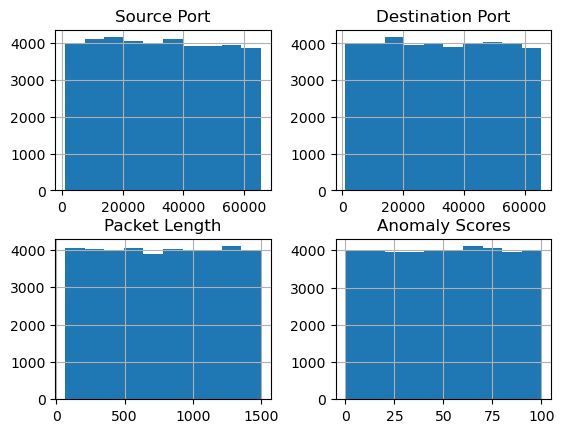

In [38]:
Cyber_Sec_DF.hist()

In [39]:
def get_feature_types(df):
    numerical_features = df.select_dtypes(include=['number']).columns.tolist()
    categorical_features = df.select_dtypes(exclude=['number']).columns.tolist()

    return categorical_features, numerical_features

# Example usage:
# Assuming 'df' is your Pandas DataFrame
categorical_cols, numerical_cols = get_feature_types(Cyber_Sec_DF)
print("Categorical Features:", categorical_cols)
print("Numerical Features:", numerical_cols)

Categorical Features: ['Source IP Address', 'Destination IP Address', 'Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators', 'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level', 'Device Information', 'Network Segment', 'Geo-location Data', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source', 'Targeted Device']
Numerical Features: ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']


In [48]:
from scipy.stats import chi2_contingency
import pandas as pd

def chi_square_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

    # Example Usage:
for col in Cyber_Sec_DF.columns :
    for col1 in Cyber_Sec_DF.columns :
        if col != col1 :
            chi2, p_value = chi_square_test(Cyber_Sec_DF.sample(1000), col, col1)
            if p_value < .05 :
                print(col, " / " , col1, " Values ",f"Chi-square: {chi2}, p-value: {p_value}")

Packet Length  /  Device Information  Values  Chi-square: 700979.1666666666, p-value: 0.01406769620883831
Packet Type  /  Attack Type  Values  Chi-square: 6.30114962523845, p-value: 0.042827502001776055
Action Taken  /  Protocol  Values  Chi-square: 13.412847862220634, p-value: 0.009425187298755357
Device Information  /  Targeted Device  Values  Chi-square: 5000.0, p-value: 0.005734244622412057
Targeted Device  /  Device Information  Values  Chi-square: 5000.0, p-value: 0.010041897805400617
